# Keras - Classification 

Classification task with Keras API for TF 2.0
    
    Identify & deal with overfitting through:
    Early Stopping Callbacks & Dropout Layers

#### Early Stopping:
Keras can automatically stop training based on a loss condition on the validation data passed during the model.fit() call

#### Dropout Layers:
Dropout can be added to layers to "turn off" neurons during training to prevent overfitting

Each dropout layer will "drop" a user-defined percentage of neuron units in the previous layer every batch. 




### Data:  Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    Number of Instances: 569

    Number of Attributes: 30 numeric, predictive attributes and the class

    Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        - class:
                - WDBC-Malignant
                - WDBC-Benign

   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/patriciamaya/Desktop/Python ML_Bootcamp/DATA/cancer_classification.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


## EDA

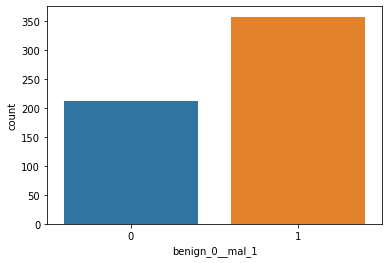

In [9]:
sns.countplot(x='benign_0__mal_1',data=df)

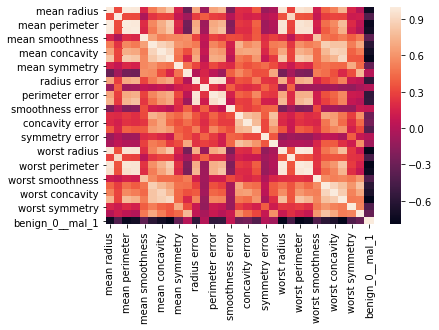

In [10]:
sns.heatmap(df.corr())

In [66]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

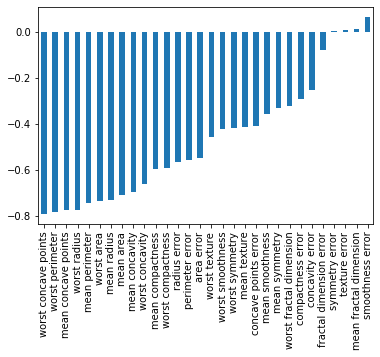

In [11]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

## Train Test Split

In [13]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [14]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)


## Scaling Data

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler()

In [20]:
X_train = scaler.fit_transform(X_train)  #only fit train data
X_test = scaler.transform(X_test)

## Creating the Model

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
                  
    

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [22]:
X_train.shape

(426, 30)

In [23]:
model = Sequential()

model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))  #last layer, binary classification

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

## Training the Model 

### Example One: Choosing too many epochs and overfitting!

In [24]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600, 
          validation_data=(X_test, y_test), 
          verbose=1
          )
#train 600 times through the entire dataset

Epoch 1/600
14/14 [==============================] - 0s 23ms/step - loss: 0.6748 - val_loss: 0.6622
Epoch 2/600
14/14 [==============================] - 0s 10ms/step - loss: 0.6233 - val_loss: 0.5993
Epoch 3/600
14/14 [==============================] - 0s 11ms/step - loss: 0.5694 - val_loss: 0.5503
Epoch 4/600
14/14 [==============================] - 0s 10ms/step - loss: 0.5239 - val_loss: 0.5014
Epoch 5/600
14/14 [==============================] - 0s 17ms/step - loss: 0.4764 - val_loss: 0.4532
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4310 - val_loss: 0.4052
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3863 - val_loss: 0.3619
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3497 - val_loss: 0.3228
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3180 - val_loss: 0.2933
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.2930 - val_loss: 0.2659
Epoc

Epoch 83/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0493 - val_loss: 0.1263
Epoch 84/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0492 - val_loss: 0.1322
Epoch 85/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0499 - val_loss: 0.1276
Epoch 86/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0473 - val_loss: 0.1314
Epoch 87/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0490 - val_loss: 0.1327
Epoch 88/600
14/14 [==============================] - 0s 10ms/step - loss: 0.0482 - val_loss: 0.1285
Epoch 89/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0474 - val_loss: 0.1282
Epoch 90/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0472 - val_loss: 0.1295
Epoch 91/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0462 - val_loss: 0.1330
Epoch 92/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0460 - val_loss: 0.1311

14/14 [==============================] - 0s 8ms/step - loss: 0.0356 - val_loss: 0.1456
Epoch 165/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0349 - val_loss: 0.1456
Epoch 166/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0343 - val_loss: 0.1533
Epoch 167/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0350 - val_loss: 0.1559
Epoch 168/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0351 - val_loss: 0.1471
Epoch 169/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0418 - val_loss: 0.1483
Epoch 170/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0361 - val_loss: 0.1542
Epoch 171/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0345 - val_loss: 0.1515
Epoch 172/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0364 - val_loss: 0.1620
Epoch 173/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0391 - val_loss: 0.1481
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0296 - val_loss: 0.1748
Epoch 246/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0311 - val_loss: 0.1720
Epoch 247/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0241 - val_loss: 0.1785
Epoch 248/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0248 - val_loss: 0.1762
Epoch 249/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0243 - val_loss: 0.1848
Epoch 250/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0243 - val_loss: 0.1775
Epoch 251/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0241 - val_loss: 0.1766
Epoch 252/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0238 - val_loss: 0.1917
Epoch 253/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0263 - val_loss: 0.1925
Epoch 254/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0236 - val_loss: 0.1788
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0192 - val_loss: 0.2127
Epoch 327/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0182 - val_loss: 0.2226
Epoch 328/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0232 - val_loss: 0.2040
Epoch 329/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0249 - val_loss: 0.2338
Epoch 330/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0205 - val_loss: 0.2068
Epoch 331/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0159 - val_loss: 0.2205
Epoch 332/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0166 - val_loss: 0.2212
Epoch 333/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0167 - val_loss: 0.2275
Epoch 334/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0183 - val_loss: 0.2060
Epoch 335/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0159 - val_loss: 0.2314
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0143 - val_loss: 0.2672
Epoch 408/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0104 - val_loss: 0.2748
Epoch 409/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0100 - val_loss: 0.2675
Epoch 410/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0146 - val_loss: 0.3237
Epoch 411/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0157 - val_loss: 0.2591
Epoch 412/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0113 - val_loss: 0.2923
Epoch 413/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0098 - val_loss: 0.2659
Epoch 414/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0101 - val_loss: 0.2882
Epoch 415/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0110 - val_loss: 0.2805
Epoch 416/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0108 - val_loss: 0.2677
Epoc

14/14 [==============================] - 0s 5ms/step - loss: 0.0056 - val_loss: 0.3552
Epoch 489/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0113 - val_loss: 0.3104
Epoch 490/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0074 - val_loss: 0.3661
Epoch 491/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0071 - val_loss: 0.3124
Epoch 492/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0060 - val_loss: 0.3452
Epoch 493/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0056 - val_loss: 0.3277
Epoch 494/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0064 - val_loss: 0.3213
Epoch 495/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0071 - val_loss: 0.3636
Epoch 496/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0052 - val_loss: 0.3217
Epoch 497/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0058 - val_loss: 0.3661
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0032 - val_loss: 0.4102
Epoch 570/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0032 - val_loss: 0.3990
Epoch 571/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0042 - val_loss: 0.4154
Epoch 572/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0037 - val_loss: 0.4432
Epoch 573/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0087 - val_loss: 0.4180
Epoch 574/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0040 - val_loss: 0.4418
Epoch 575/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0045 - val_loss: 0.4286
Epoch 576/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0033 - val_loss: 0.4064
Epoch 577/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0041 - val_loss: 0.4470
Epoch 578/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0052 - val_loss: 0.3877
Epoc

In [27]:
model_losses = pd.DataFrame(model.history.history)

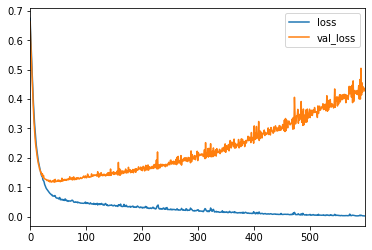

In [28]:
model_losses.plot()

we can see we are clearly overfitting our model. 
In the beginning, both training & validation loss are decreasing, which is good. 
However, at some point the training loss is still decreasing while the validation loss increases. Thus, we are overfitting. We are training for too many epochs. 

We should use Early Stoppoping - Callbacks

## Example Two: Early Stopping to avoid overfitting

We trained too much! Let's use early stopping to track the val_loss and stop training once it begins increasing too much!

In [29]:
#using same model as before
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [30]:
from tensorflow.keras.callbacks import EarlyStopping

Stop training when a monitored quantity has stopped improving.

    Arguments:
        monitor: Quantity to be monitored.
        min_delta: Minimum change in the monitored quantity
            to qualify as an improvement, i.e. an absolute
            change of less than min_delta, will count as no
            improvement.
        patience: Number of epochs with no improvement
            after which training will be stopped.
        verbose: verbosity mode.
        mode: One of `{"auto", "min", "max"}`. In `min` mode,
            training will stop when the quantity
            monitored has stopped decreasing; in `max`
            mode it will stop when the quantity
            monitored has stopped increasing; in `auto`
            mode, the direction is automatically inferred
            from the name of the monitored quantity.

In [31]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
#our metric is loss, we want to minimize it: mode='min'
#if metric was accuracy, we would want to maximize it 'max'

In [32]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]   #new line
          )

Epoch 1/600
14/14 [==============================] - 0s 26ms/step - loss: 0.6818 - val_loss: 0.6706
Epoch 2/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6530 - val_loss: 0.6376
Epoch 3/600
14/14 [==============================] - 0s 9ms/step - loss: 0.6202 - val_loss: 0.6049
Epoch 4/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5864 - val_loss: 0.5672
Epoch 5/600
14/14 [==============================] - 0s 9ms/step - loss: 0.5481 - val_loss: 0.5245
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5060 - val_loss: 0.4778
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4604 - val_loss: 0.4314
Epoch 8/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4180 - val_loss: 0.3862
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3757 - val_loss: 0.3446
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3402 - val_loss: 0.3108
Epoch 11

our model stopped training before the 600 epochs

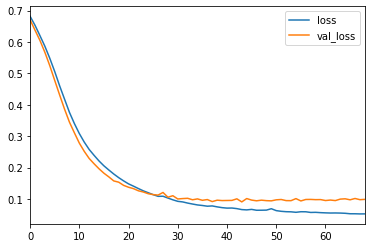

In [33]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

This is a good behavior. 

## Example Three: Adding in DropOut Layers to avoid overfitting

In [34]:
from tensorflow.keras.layers import Dropout

In [35]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(rate = 0.5))  #new layer

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(rate = 0.5))  #new layer

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

Dropout is a random selection 

    Dropout(rate = 0) , taking 0% of the neurons to turn off
    Dropout(rate = 1) , taking 100% of the neurons to turn off
    Dropout(rate = 0.5), half the neurons during each epoch, will be turned off, so their weights and biases won't be updtaed


In [36]:
#model with early stopping and dropout
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
14/14 [==============================] - 0s 13ms/step - loss: 0.7055 - val_loss: 0.6812
Epoch 2/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6858 - val_loss: 0.6541
Epoch 3/600
14/14 [==============================] - 0s 9ms/step - loss: 0.6653 - val_loss: 0.6391
Epoch 4/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6426 - val_loss: 0.6283
Epoch 5/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6423 - val_loss: 0.6136
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6036 - val_loss: 0.5936
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6079 - val_loss: 0.5671
Epoch 8/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5885 - val_loss: 0.5453
Epoch 9/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5679 - val_loss: 0.5215
Epoch 10/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5489 - val_loss: 0.4921
Epoch 11

Epoch 83/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1143 - val_loss: 0.0783
Epoch 84/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1151 - val_loss: 0.0870
Epoch 85/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1259 - val_loss: 0.0763
Epoch 86/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1062 - val_loss: 0.0767
Epoch 87/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1091 - val_loss: 0.0820
Epoch 88/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0949 - val_loss: 0.0840
Epoch 89/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1216 - val_loss: 0.0849
Epoch 90/600
14/14 [==============================] - 0s 6ms/step - loss: 0.1091 - val_loss: 0.0856
Epoch 91/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1131 - val_loss: 0.0822
Epoch 92/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1146 - val_loss: 0.0817


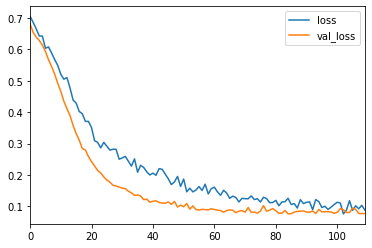

In [37]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

# Model Evaluation

In [38]:
predictions = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [42]:
#predictions

In [43]:
from sklearn.metrics import classification_report,confusion_matrix

In [44]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [45]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 2 86]]
